The key intuition here is to have low-layers alternating convolution operations with max-pooling operations. 

The convolution operations are based on carefully chosen local receptive fields with shared weights for multiple feature maps. Then, higher levels are fully connected
layers based on a traditional MLP with hidden layers and softmax as the output layer.

In [11]:
# import the necessary packages
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import numpy as np

import matplotlib.pyplot as plt

np.random.seed(1671)  # for reproducibility

In [24]:
#define the convnet 
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        # CONV => RELU => POOL
        model.add(Conv2D(20, kernel_size=5, padding="same",input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
        # CONV => RELU => POOL
        model.add(Conv2D(50, kernel_size=5, padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
        # Flatten => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # a softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model

In [25]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

In [26]:
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10  # number of outputs = number of digits
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

In [27]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
K.common.set_image_dim_ordering("th")

In [28]:
# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255  

In [29]:
# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]

In [30]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [31]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [32]:
# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", 
              optimizer=OPTIMIZER,
              metrics=["accuracy"])

In [33]:
history = model.fit(X_train, y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=NB_EPOCH, 
                    verbose=VERBOSE, 
                    validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 31s 654us/sample - loss: 0.3623 - accuracy: 0.8935 - val_loss: 0.1334 - val_accuracy: 0.9602
Epoch 2/20
48000/48000 [==============================] - 2s 44us/sample - loss: 0.1087 - accuracy: 0.9661 - val_loss: 0.0845 - val_accuracy: 0.9752
Epoch 3/20
48000/48000 [==============================] - 2s 43us/sample - loss: 0.0762 - accuracy: 0.9763 - val_loss: 0.0708 - val_accuracy: 0.9783
Epoch 4/20
48000/48000 [==============================] - 2s 43us/sample - loss: 0.0600 - accuracy: 0.9817 - val_loss: 0.0748 - val_accuracy: 0.9778
Epoch 5/20
48000/48000 [==============================] - 2s 43us/sample - loss: 0.0496 - accuracy: 0.9839 - val_loss: 0.0681 - val_accuracy: 0.9793
Epoch 6/20
48000/48000 [==============================] - 2s 43us/sample - loss: 0.0425 - accuracy: 0.9861 - val_loss: 0.0548 - val_accuracy: 0.9835
Epoch 7/20
48000/48000 [==============================

In [34]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 99us/sample - loss: 0.0613 - accuracy: 0.9852TA: 1s - l

Test score: 0.06133965609444201
Test accuracy: 0.9852


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


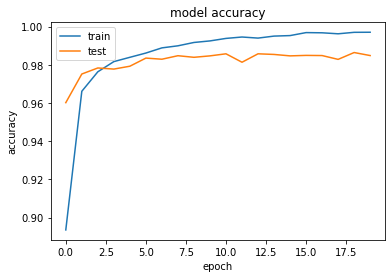

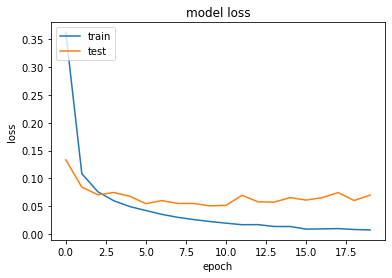

In [36]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()